<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/jennlee/jenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# List the contents of your Google Drive
drive_path = '/content/drive/MyDrive/co_note/project/data'
files = os.listdir(drive_path)
print(files)

['transaction_new.csv', 'click_stream_new.csv', 'customer.csv', 'product.csv']


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

In [3]:
# Load the datasets
transaction = pd.read_csv('/content/drive/MyDrive/co_note/project/data/transaction_new.csv')
customer = pd.read_csv('/content/drive/MyDrive/co_note/project/data/customer.csv')
product = pd.read_csv('/content/drive/MyDrive/co_note/project/data/product.csv')
click_stream = pd.read_csv('/content/drive/MyDrive/co_note/project/data/click_stream_new.csv')

# Dataset

# New Section

## Transaction

In [ ]:
transaction.isna().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [4]:
transaction['created_at'] = pd.to_datetime(transaction['created_at']).dt.strftime('%Y-%m-%d')
transaction['shipment_date_limit'] = pd.to_datetime(transaction['shipment_date_limit']).dt.strftime('%Y-%m-%d')
transaction['created_at'] = pd.to_datetime(transaction['created_at'])
transaction['shipment_date_limit'] = pd.to_datetime(transaction['shipment_date_limit'])

In [5]:
transaction[['created_at','shipment_date_limit']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 2 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   created_at           1254585 non-null  datetime64[ns]
 1   shipment_date_limit  1254585 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 19.1 MB


In [6]:
# promocode labeling (1: w/ promo, 0: w/o promo)
transaction['w_promo'] = transaction['promo_code'].fillna(0).map(lambda x: 1 if x != 0 else 0).astype(int)
transaction['w_promo']

0          1
1          0
2          0
3          0
4          0
          ..
1254580    0
1254581    1
1254582    1
1254583    1
1254584    1
Name: w_promo, Length: 1254585, dtype: int64

In [ ]:
display(transaction.head(), transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_at              1254585 non-null  datetime64[ns]
 1   customer_id             1254585 non-null  int64         
 2   booking_id              1254585 non-null  object        
 3   session_id              1254585 non-null  object        
 4   payment_method          1254585 non-null  object        
 5   payment_status          1254585 non-null  object        
 6   promo_amount            1254585 non-null  int64         
 7   promo_code              1254585 non-null  object        
 8   shipment_fee            1254585 non-null  int64         
 9   shipment_date_limit     1254585 non-null  datetime64[ns]
 10  shipment_location_lat   1254585 non-null  float64       
 11  shipment_location_long  1254585 non-null  float64       
 12  total_amount  

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,w_promo
0,2018-07-29,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03,-8.227893,111.969107,199832,54728,1,191247,1
1,2018-07-30,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,0,10000,2018-08-03,3.013470,107.802514,155526,16193,1,145526,0
2,2018-09-15,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,0,10000,2018-09-18,-2.579428,115.743885,550696,53686,4,135174,0
3,2018-11-01,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,0,0,2018-11-05,-3.602334,120.363824,271012,20228,1,271012,0
4,2018-12-18,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,0,0,2018-12-23,-3.602334,120.363824,198753,55220,1,198753,0


None

In [ ]:
transaction[transaction['payment_status'] != 'Success'].shape

(53550, 17)

In [7]:
transaction = transaction[transaction['payment_status']=='Success']

In [8]:
# promo in July
transaction['month'] = transaction['created_at'].dt.month
transactions_july = transaction[transaction['month'] == 7]
promo_sales_july = transactions_july.groupby('promo_code')['total_amount'].sum()

# promo in 2021
transaction['year'] = transaction['created_at'].dt.year
transactions_2021 = transaction[transaction['year'] == 2021]
promo_sales_2021 = transactions_2021.groupby('promo_code')['total_amount'].sum()

print(promo_sales_july.sort_values(), promo_sales_2021.sort_values())

<ipython-input-8-4a0653b0d6fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['month'] = transaction['created_at'].dt.month


promo_code
STARTUP           1719078719
SC2022            1726827295
WEEKENDMANTAP     3283554683
LIBURDONG         3689966826
XX2022            7116266521
BUYMORE           8872672885
WEEKENDSERU       9518087742
AZ2022           13390321547
Name: total_amount, dtype: int64 promo_code
SC2022            6144718398
STARTUP           6389686940
WEEKENDMANTAP     9004517973
LIBURDONG         9708038443
XX2022           19880948672
WEEKENDSERU      27815502219
BUYMORE          31674707435
AZ2022           41848207527
Name: total_amount, dtype: int64


In [ ]:
# promo_code 별 transaction 발생 수
grouped = transaction.groupby('promo_code').size().sort_values(ascending=False)
grouped

promo_code
0                773446
AZ2022           131312
BUYMORE           98373
WEEKENDSERU       91489
XX2022            65802
LIBURDONG         31084
WEEKENDMANTAP     30013
SC2022            16649
STARTUP           16417
dtype: int64

In [ ]:
# promo_code 별 transaction이 일어난 total_amount
grouped_amt = transaction.groupby('promo_code')['total_amount'].sum().sort_values(ascending=False)
grouped_amt

promo_code
0                918598633336
AZ2022           155586781463
BUYMORE          116497387627
WEEKENDSERU      106414186422
XX2022            74687436338
LIBURDONG         36395488250
WEEKENDMANTAP     34318974756
STARTUP           20214991605
SC2022            19670838781
Name: total_amount, dtype: int64

In [ ]:
# count of transaction when payment was successful
scs_trans = transaction[(transaction['promo_code'] != 0) & (transaction['payment_status'] == 'Success')].groupby('promo_code').size()
scs_trans

promo_code
AZ2022           125748
BUYMORE           94204
LIBURDONG         29708
SC2022            15956
STARTUP           15744
WEEKENDMANTAP     28788
WEEKENDSERU       87677
XX2022            63146
dtype: int64

In [ ]:
# sum of transaction when payment was successful
transaction[(transaction['promo_code'] != 0) & (transaction['payment_status'] == 'Success')].groupby('promo_code')['total_amount'].sum().sort_values(ascending=False)

promo_code
AZ2022           149099541743
BUYMORE          110947884438
WEEKENDSERU      102421110557
XX2022            72320031960
LIBURDONG         34802390026
WEEKENDMANTAP     33204811592
STARTUP           19616470219
SC2022            18977337505
Name: total_amount, dtype: int64

In [ ]:
transaction.shape[0]

1254585

In [ ]:
p_failure = transaction[transaction['payment_status'] == 'Failed'].shape[0]
print("failed transaction: ", p_failure)
print("successful transaction:", transaction[transaction['payment_status'] == 'Success'].shape[0])

failed transaction:  53550
successful transaction: 1201035


In [ ]:
deducted_count = grouped - scs_trans
deducted_count

promo_code
0                   NaN
AZ2022           5564.0
BUYMORE          4169.0
LIBURDONG        1376.0
SC2022            693.0
STARTUP           673.0
WEEKENDMANTAP    1225.0
WEEKENDSERU      3812.0
XX2022           2656.0
dtype: float64

Proportion of transactions with promotions: 0.38
Proportion of transactions without promotions: 0.62


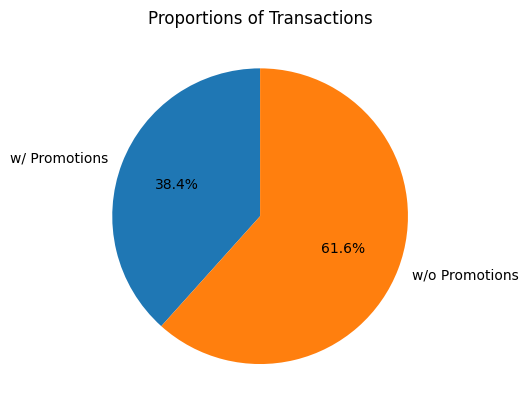

In [ ]:
# Calculate the proportion of transactions with promotions
total_transactions = len(transaction)
promotions_count = (transaction['promo_code'] == 1).sum()
promotions_proportion = promotions_count / total_transactions

# Calculate the proportion of transactions without promotions
no_promotions_count = (transaction['promo_code'] == 0).sum()
no_promotions_proportion = no_promotions_count / total_transactions

print("Proportion of transactions with promotions:", promotions_proportion.round(2))
print("Proportion of transactions without promotions:", no_promotions_proportion.round(2))

# Calculate the proportions
proportions = [promotions_proportion, no_promotions_proportion]
labels = ['w/ Promotions', 'w/o Promotions']

plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportions of Transactions')

# Display the chart
plt.show()

promo_avg_amount: 1171773.82
non_promo_avg_amount: 1187670.03


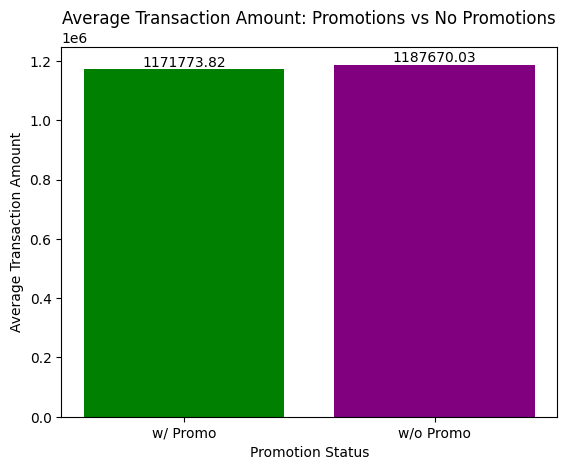

In [ ]:
# Filter transactions with promotions
promo_trx = transaction[transaction['promo_code']==1]

# Filter transactions without promotions
non_promo_trx = transaction[transaction['promo_code']==0]

# average transaction amount for transactions w/ promo
promo_avg_amount = promo_trx['total_amount'].mean()

# average transaction amount for transactions w/o promo
non_promo_avg_amount = non_promo_trx['total_amount'].mean()

print("promo_avg_amount:", promo_avg_amount.round(2))
print("non_promo_avg_amount:", non_promo_avg_amount.round(2))

# Create a bar plot to compare the average transaction amounts
labels = ['w/ Promo', 'w/o Promo']
amounts = [promo_avg_amount, non_promo_avg_amount]
colors = ['green', 'purple']

plt.bar(labels, amounts, color=colors)

# Add value labels on top of each bar
for i, v in enumerate(amounts):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.xlabel('Promotion Status')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount: Promotions vs No Promotions')
plt.show()

## Customer

In [ ]:
display(customer.head(),customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


None

In [ ]:
customer[customer['home_country']!= 'Indonesia']

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date


In [9]:
# changing datatype (object -> datetime)
customer['birthdate'] = pd.to_datetime(customer['birthdate'])
customer['first_join_date'] = pd.to_datetime(customer['first_join_date'])

In [10]:
customer[['first_join_date','birthdate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   first_join_date  100000 non-null  datetime64[ns]
 1   birthdate        100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 MB


In [ ]:
customer['year_month'] = customer['first_join_date'].dt.to_period('M')  # Extract the year and month as a period

influx_by_month_year = customer.groupby('year_month').size().sort_values(ascending = False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(influx_by_month_year)

year_month
2021-07    3348
2020-07    2500
2022-01    2361
2021-10    2247
2021-08    2214
2022-07    2202
2019-07    2100
2022-05    2054
2022-04    2019
2018-07    2016
2022-03    1954
2021-09    1934
2021-11    1919
2022-02    1919
2021-12    1877
2020-08    1859
2022-06    1851
2021-01    1775
2017-07    1725
2021-05    1707
2020-10    1589
2020-11    1569
2021-03    1501
2021-06    1439
2020-05    1430
2020-09    1426
2020-12    1415
2021-04    1413
2019-08    1402
2021-02    1386
2020-02    1340
2019-11    1302
2019-12    1278
2019-03    1264
2019-09    1258
2019-06    1243
2018-09    1238
2019-10    1232
2020-04    1190
2018-12    1186
2020-03    1183
2020-06    1175
2020-01    1145
2018-08    1138
2019-02    1111
2017-12    1104
2019-05    1089
2018-06    1079
2018-03    1061
2018-11    1048
2017-10    1039
2017-09    1022
2018-10    1021
2019-04    1015
2019-01    1009
2018-01     994
2017-08     960
2018-04     957
2017-11     931
2018-05     925
2018-02     924
2016-10     8

July has the most active customer influx

In [ ]:
customer['year'] = customer['first_join_date'].dt.year  # Extract the year
customer['month'] = customer['first_join_date'].dt.month  # Extract the month

influx_by_year = customer.groupby('year').size()
influx_by_month = customer.groupby('month').size()

# Print the customer influx by year and month
print("Customer Influx by Year:")
print(influx_by_year)

print("\nCustomer Influx by Month:")
print(influx_by_month)

Customer Influx by Year:
year
2016     4729
2017    11440
2018    13587
2019    15303
2020    17821
2021    22760
2022    14360
dtype: int64

Customer Influx by Month:
month
1      8100
2      7429
3      7773
4      7457
5      7915
6      7504
7     14716
8      8293
9      7629
10     8009
11     7533
12     7642
dtype: int64


- 2021 has the most active customer influx, accounting for 22.7%.
- July has the most active customer influx, accounting for 14.7%.


 > check promo's impact on influx in transaction dataset.<br/>
 -> promo most used in July<br/>
 -> promo mostly used in 2021

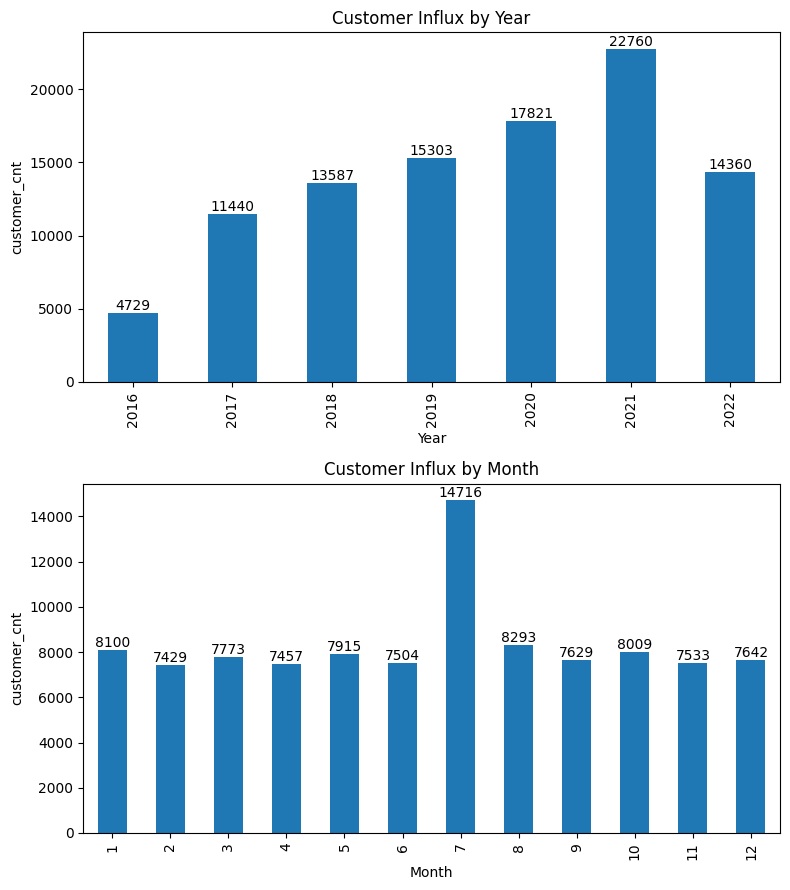

In [ ]:
# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 9))

# customer influx by year
influx_by_year.plot(kind='bar', ax=ax1)
ax1.set_title('Customer Influx by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('customer_cnt')
# Add numbers on top of each bar
for i, v in enumerate(influx_by_year):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# customer influx by month
influx_by_month.plot(kind='bar', ax=ax2)
ax2.set_title('Customer Influx by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('customer_cnt')
# Add numbers on top of each bar
for i, v in enumerate(influx_by_month):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.tight_layout()

# Display the graph
plt.show()

In [ ]:
customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [ ]:
# drop the unnecessary columns 
columns_to_drop = ['email', 'home_location_lat', 'home_location_long', 'first_name', 'last_name', 'home_country']
customer.drop(columns=columns_to_drop, inplace=True)
customer

## Product

In [ ]:
display(product.info(),product.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


None

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
product['season'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
44441    False
44442    False
44443    False
44444    False
44445    False
Name: season, Length: 44446, dtype: bool

In [ ]:
product.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [ ]:
print(product[product['year'].isna()])

          id gender masterCategory subCategory articleType baseColour season  \
21285  53781    Men        Apparel     Topwear     Tshirts       Blue    NaN   

       year   usage                      productDisplayName  
21285   NaN  Sports  Puma Men Blue Sless Round Neck T-shirt  


In [ ]:
# year (float -> int)
# Fill NaN value in 'year' column with a specific integer value (e.g., -1)
product['year'] = product['year'].fillna(-1).astype(int)

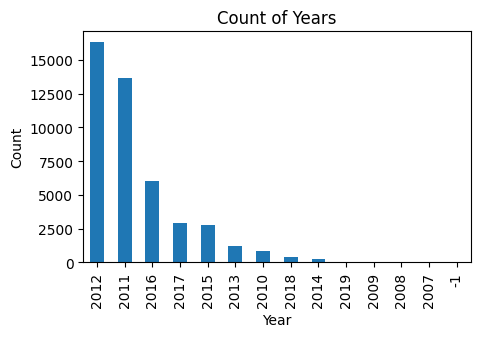

In [ ]:
year_counts = product['year'].value_counts()

plt.figure(figsize=(5, 3))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.show()

In [ ]:
product['year'].value_counts()

 2012    16290
 2011    13689
 2016     6007
 2017     2917
 2015     2780
 2013     1213
 2010      846
 2018      405
 2014      236
 2019       33
 2009       20
 2008        7
 2007        2
-1           1
Name: year, dtype: int64

회사의 설립이 16년에 됐기 때문에 제품 연도를 제품의 생산년도로 파악하기로 했다.

## click_stream

In [ ]:
display(click_stream.head(10), click_stream.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   event_id         object 
 4   traffic_source   object 
 5   product_id       float64
 6   quantity         float64
 7   item_price       float64
 8   payment_status   object 
 9   search_keywords  object 
 10  promo_code       object 
 11  promo_amount     float64
dtypes: float64(4), object(8)
memory usage: 1.1+ GB


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01T12:07:00.322763Z,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,NaN,NaN,NaN,NaN,Dress Kondangan,NaN,NaN
6,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:08:27.322763Z,365b3840-9647-4bf5-917f-f0bec3d05332,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:09:49.322763Z,1a1e3548-108e-4520-bf04-1b01d43a72cb,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7d440441-e67a-4d36-b324-80ffd636d166,SCROLL,2019-09-01T12:11:06.322763Z,f7246095-b094-46c1-b2ac-bcfd080146c3,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:12:19.322763Z,74a000dc-b931-4c59-abcc-02e991623bc1,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

In [ ]:
click_stream.event_name.unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [ ]:
click_stream.payment_status.value_counts()

Success    815962
Failed      36620
Name: payment_status, dtype: int64

In [ ]:
click_stream.shape

(12833602, 12)

In [ ]:
import math
click_stream.shape[0] - click_stream['promo_code'].isna().sum()

326535

In [ ]:
click_stream.isna().sum()

session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
product_id         10896445
quantity           10896445
item_price         10896445
payment_status     11981020
search_keywords    11660336
promo_code         12507067
promo_amount       12507067
dtype: int64

# EDA

In [12]:
# Merge transaction and customer datasets
merged = pd.merge(transaction, customer, on='customer_id', how='left')
merged.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2018-07-29,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03,...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28
1,2018-07-30,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03,...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28
2,2018-09-15,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18,...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28
3,2018-11-01,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05,...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28
4,2018-12-18,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23,...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28


In [ ]:
merged.columns

Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id', 'quantity',
       'item_price', 'w_promo', 'first_name', 'last_name', 'username', 'email',
       'gender', 'birthdate', 'device_type', 'device_id', 'device_version',
       'home_location_lat', 'home_location_long', 'home_location',
       'home_country', 'first_join_date', 'year_month'],
      dtype='object')

In [14]:
merged_new = merged[['first_join_date', 'customer_id', 'created_at', 'session_id',
       'payment_method', 'payment_status', 'w_promo','promo_amount', 'promo_code', 'shipment_fee',
       'quantity', 'item_price', 'total_amount', 'product_id', 'username', 'gender', 'birthdate',
       'device_type']]

In [15]:
# successful payment만 추출
merged_new = merged_new[merged_new['payment_status']=='Success']

In [ ]:
merged_new.total_amount.isna().sum()

0

In [ ]:
merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1254584
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   first_join_date  1201035 non-null  datetime64[ns]
 1   customer_id      1201035 non-null  int64         
 2   created_at       1201035 non-null  datetime64[ns]
 3   session_id       1201035 non-null  object        
 4   payment_method   1201035 non-null  object        
 5   payment_status   1201035 non-null  object        
 6   w_promo          1201035 non-null  int64         
 7   promo_amount     1201035 non-null  int64         
 8   promo_code       1201035 non-null  object        
 9   shipment_fee     1201035 non-null  int64         
 10  quantity         1201035 non-null  int64         
 11  item_price       1201035 non-null  int64         
 12  total_amount     1201035 non-null  int64         
 13  product_id       1201035 non-null  int64         
 14  us

In [ ]:
merged_new.head()

,first_join_date,customer_id,created_at,session_id,payment_method,payment_status,w_promo,promo_amount,promo_code,shipment_fee,quantity,item_price,total_amount,product_id,username,gender,birthdate,device_type,join_year
0,2018-07-28,5868,2018-07-29,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1,1415,WEEKENDSERU,10000,1,191247,199832,54728,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,F,2000-08-20,Android,2018
1,2018-07-28,4774,2018-07-30,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,0,0,10000,1,145526,155526,16193,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android,2018
2,2018-07-28,4774,2018-09-15,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,0,0,10000,4,135174,550696,53686,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android,2018
3,2018-07-28,4774,2018-11-01,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,0,0,0,1,271012,271012,20228,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android,2018
4,2018-07-28,4774,2018-12-18,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,0,0,0,1,198753,198753,55220,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android,2018


## total sales for new customer vs existing customer by year

In [16]:
# join_year 추출
merged_new['join_year'] = merged_new['first_join_date'].dt.year
merged_new['created_year'] = merged_new['created_at'].dt.year

# year index 생성
sales_by_year = pd.DataFrame(index=merged_new['join_year'].sort_values().unique())

# 2016
# s_16 = merged_new[merged_new['join_year'] == 2016]
s_16_new = merged_new[(merged_new['join_year'] == 2016) & (merged_new['created_year'] == 2016)]['total_amount'].sum()
s_16_existing = 0

#2017
s_17_new = merged_new[(merged_new['join_year'] == 2017) & (merged_new['created_year'] == 2017)]['total_amount'].sum()
s_17_existing = merged_new[(merged_new['created_year'] == 2017) & (merged_new['join_year'] < 2017)]['total_amount'].sum()
# -> 이때 transaction['created_at'].dt.year 도 2017이어야함

# 2018
s_18_new = merged_new[(merged_new['join_year'] == 2018) & (merged_new['created_year'] == 2018)]['total_amount'].sum()
s_18_existing = merged_new[(merged_new['created_year'] == 2018) & (merged_new['join_year'] < 2018)]['total_amount'].sum()

# 2019
s_19_new = merged_new[(merged_new['join_year'] == 2019) & (merged_new['created_year'] == 2019)]['total_amount'].sum()
s_19_existing = merged_new[(merged_new['created_year'] == 2019) & (merged_new['join_year'] < 2019)]['total_amount'].sum()

# 2020
s_20_new = merged_new[(merged_new['join_year'] == 2020) & (merged_new['created_year'] == 2020)]['total_amount'].sum()
s_20_existing = merged_new[(merged_new['created_year'] == 2020) & (merged_new['join_year'] < 2020) & (merged_new['join_year'] == 2019)]['total_amount'].sum()

# 2021
s_21_new = merged_new[(merged_new['join_year'] == 2021) & (merged_new['created_year'] == 2021)]['total_amount'].sum()
s_21_existing = merged_new[(merged_new['created_year'] == 2021) & (merged_new['join_year'] < 2021)]['total_amount'].sum()

# 2022
s_22_new = merged_new[(merged_new['join_year'] == 2022) & (merged_new['created_year'] == 2022)]['total_amount'].sum()
s_22_existing = merged_new[(merged_new['created_year'] == 2021) & (merged_new['join_year'] < 2022)]['total_amount'].sum()

# Create a dictionary to store the data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'New Customers': [s_16_new, s_17_new, s_18_new, s_19_new, s_20_new, s_21_new, s_22_new],
    'Existing Customers': [s_16_existing, s_17_existing, s_18_existing, s_19_existing, s_20_existing, s_21_existing, s_22_existing]
}

# Create a DataFrame from the data
sales_by_year = pd.DataFrame(data)

# Set the 'Year' column as the index
sales_by_year.set_index('Year', inplace=True)
sales_by_year

,New Customers,Existing Customers
Year,,
2016,8172407708,0
2017,35637685826,20121654839
2018,43577186422,80091287655
2019,43185849550,147411198411
2020,63551655541,77497803488
2021,95709427644,333674551165
2022,61849222404,429383978809


In [17]:
# total sales by summing 'New Customers' and 'Existing Customers'
sales_by_year['Total'] = sales_by_year[['New Customers', 'Existing Customers']].sum(axis=1)
sales_by_year

,New Customers,Existing Customers,Total
Year,,,
2016,8172407708,0,8172407708
2017,35637685826,20121654839,55759340665
2018,43577186422,80091287655,123668474077
2019,43185849550,147411198411,190597047961
2020,63551655541,77497803488,141049459029
2021,95709427644,333674551165,429383978809
2022,61849222404,429383978809,491233201213


2020년도 existing customers 총 매출액이 현저히 줄어듬

In [ ]:
sales_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2016 to 2022
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   New Customers       7 non-null      int64
 1   Existing Customers  7 non-null      int64
 2   Total               7 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes


In [ ]:
sales_by_year

,New Customers,Existing Customers,Total
Year,,,
2016,8172407708,0,8172407708
2017,35637685826,20121654839,55759340665
2018,43577186422,80091287655,123668474077
2019,43185849550,147411198411,190597047961
2020,63551655541,77497803488,141049459029
2021,95709427644,333674551165,429383978809
2022,61849222404,429383978809,491233201213


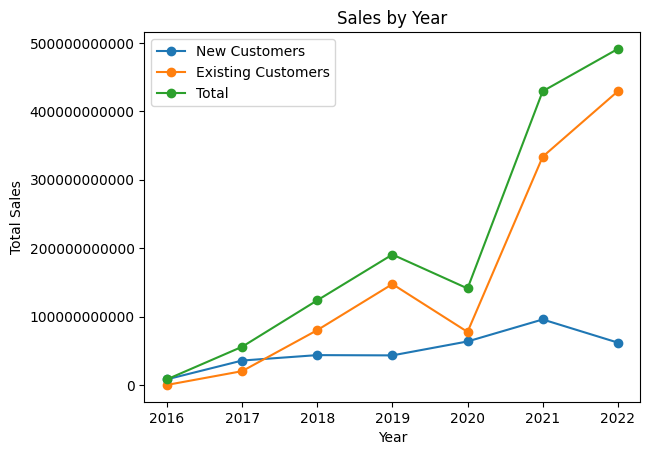

In [18]:
# Plot the lines for 'New Customers', 'Existing Customers', and 'Total'
sales_by_year.plot(kind='line', marker='o')

plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Modify the y-axis tick labels to display in full numeric form
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## sales proportion for new vs existing by year

In [ ]:
# number of customer_counts
customer_counts = .groupby('join_year')['customer_id'].nunique()

new_customers_count = customer_counts[customer_counts.index == 2016].sum()
existing_customers_count = customer_counts[customer_counts.index < 2016].sum()

In [ ]:
merged_new[merged_new.duplicated(subset='customer_id', keep=False)]['customer_id'].nunique()

41766

In [ ]:
customer_counts

join_year
2016     2478
2017     6541
2018     7414
2019     8106
2020     9205
2021    10681
2022     5817
Name: customer_id, dtype: int64

In [ ]:
2016     4729
2017    11440
2018    13587
2019    15303
2020    17821
2021    22760
2022    14360

In [ ]:
print(new_customers_count, existing_customers_count)

2478 0


In [ ]:
merged_new.customer_id

In [19]:
pd.options.display.float_format = '{:.2f}'.format

# number of customer_counts
customer_counts = merged_new.groupby('join_year')['customer_id'].nunique()

new_customers_count = customer_counts[customer_counts.index == 2016]
existing_customers_count = customer_counts[customer_counts.index < 2016].sum()

new_16_count = s_16_new / merged_new[merged_new['join_year'] == 2016]['customer_id'].nunique()
print(merged_new[merged_new['join_year'] == 2016]['customer_id'].nunique())
existing_16_count = 'NA'

new_17_count = s_17_new / merged_new[merged_new['join_year'] == 2017]['customer_id'].nunique()
existing_17_count = s_16_existing / merged_new[merged_new['join_year'] < 2017]['customer_id'].nunique()

new_18_count = s_18_new / merged_new[merged_new['join_year'] == 2018]['customer_id'].nunique()
existing_18_count = s_18_existing / merged_new[merged_new['join_year'] < 2018]['customer_id'].nunique()

new_19_count = s_19_new / merged_new[merged_new['join_year'] == 2019]['customer_id'].nunique()
existing_19_count = s_19_existing / merged_new[merged_new['join_year'] < 2019]['customer_id'].nunique()

new_20_count = s_20_new / merged_new[merged_new['join_year'] == 2020]['customer_id'].nunique()
existing_20_count = s_20_existing / merged_new[merged_new['join_year'] < 2020]['customer_id'].nunique()

new_21_count = s_21_new / merged_new[merged_new['join_year'] == 2021]['customer_id'].nunique()
existing_21_count = s_21_existing / merged_new[merged_new['join_year'] < 2021]['customer_id'].nunique()

new_22_count = s_22_new / merged_new[merged_new['join_year'] == 2022]['customer_id'].nunique()
existing_22_count = s_22_existing / merged_new[merged_new['join_year'] < 2022]['customer_id'].nunique()

# Create a dictionary to store the data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'New Customers': [new_16_count, new_17_count, new_18_count, new_19_count, new_20_count, new_21_count, new_22_count],
    'Existing Customers': [existing_16_count, existing_17_count, existing_18_count, existing_19_count, existing_20_count, existing_21_count, existing_22_count]
}

# Create a DataFrame from the data
avg_by_year = pd.DataFrame(data)

# Set the 'Year' column as the index
avg_by_year.set_index('Year', inplace=True)
avg_by_year

2478


,New Customers,Existing Customers
Year,,
2016,3297985.35,NA
2017,5448354.35,0.00
2018,5877689.02,8880284.69
2019,5327639.96,8970437.44
2020,6904036.45,3158148.40
2021,8960717.88,9888411.31
2022,10632494.83,9665368.12


In [ ]:
display(merged_new.head(), merged_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   first_join_date  1254585 non-null  datetime64[ns]
 1   customer_id      1254585 non-null  int64         
 2   created_at       1254585 non-null  datetime64[ns]
 3   session_id       1254585 non-null  object        
 4   payment_method   1254585 non-null  object        
 5   payment_status   1254585 non-null  object        
 6   w_promo          1254585 non-null  int64         
 7   promo_amount     1254585 non-null  int64         
 8   promo_code       1254585 non-null  object        
 9   shipment_fee     1254585 non-null  int64         
 10  quantity         1254585 non-null  int64         
 11  item_price       1254585 non-null  int64         
 12  total_amount     1254585 non-null  int64         
 13  product_id       1254585 non-null  int64         
 14  us

,first_join_date,customer_id,created_at,session_id,payment_method,payment_status,w_promo,promo_amount,promo_code,shipment_fee,quantity,item_price,total_amount,product_id,username,gender,birthdate,device_type
0,2018-07-28,5868,2018-07-29,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1,1415,WEEKENDSERU,10000,1,191247,199832,54728,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,F,2000-08-20,Android
1,2018-07-28,4774,2018-07-30,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,0,0,10000,1,145526,155526,16193,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
2,2018-07-28,4774,2018-09-15,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,0,0,10000,4,135174,550696,53686,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
3,2018-07-28,4774,2018-11-01,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,0,0,0,1,271012,271012,20228,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
4,2018-07-28,4774,2018-12-18,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,0,0,0,1,198753,198753,55220,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android


None

## customer segmentation with promocode

"Heavy Promo Users," "Occasional Promo Users," and "Non-Promo Users"

In [22]:
merged_promo = merged[['customer_id', 'w_promo']]

# 고객별 프로모션 사용한 transaction 수
# the count of transactions with promotions for each customer)
promo_counts = merged_promo.groupby('customer_id')['w_promo'].sum().reset_index(name='promo_count')

# 고객별 전체 transaction 수
# the total count of transactions (both with promotions and non-promotions) for each customer
total_counts = merged_promo.groupby('customer_id')['w_promo'].count().reset_index(name='total_count')

# merge the two
merged_counts = promo_counts.merge(total_counts, on='customer_id', how='outer')

# ratio
merged_counts['promo_ratio'] = merged_counts['promo_count'] / merged_counts['total_count']

merged_counts.head()

,customer_id,promo_count,total_count,promo_ratio
0,3,37,69,0.54
1,8,1,8,0.12
2,9,0,8,0.00
3,11,1,1,1.00
4,15,4,9,0.44


In [27]:
# average promo_ratio
merged_counts['promo_ratio'].sum()/merged_counts.shape[0]

0.35991994358029367

### K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


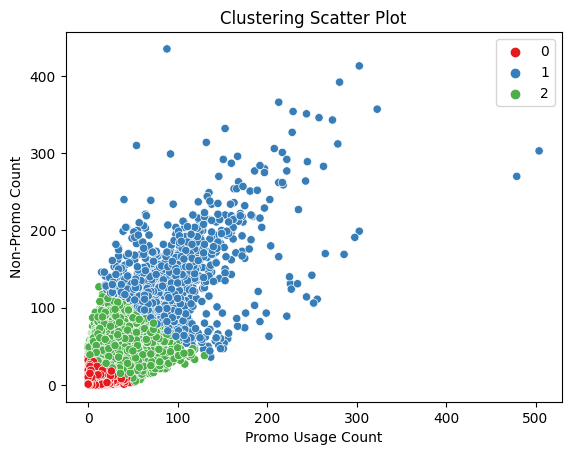

In [28]:
# non-promo count by subtracting the promo count from the total count
non_promo_count = merged_counts['total_count'] - merged_counts['promo_count']

# the data for clustering
data = pd.DataFrame({'promo_count': merged_counts['promo_count'], 'non_promo_count': non_promo_count})

# k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# clustering scatter plot
sns.scatterplot(x=merged_counts['promo_count'], y=non_promo_count, hue=cluster_labels, palette='Set1')
plt.xlabel('Promo Usage Count')
plt.ylabel('Non-Promo Count')
plt.title('Clustering Scatter Plot')

# Display the plot
plt.show()

In [25]:
# Select the promo_ratio column for clustering
X = merged_counts[['promo_ratio']]

# Perform k-means clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the merged_counts DataFrame
merged_counts['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


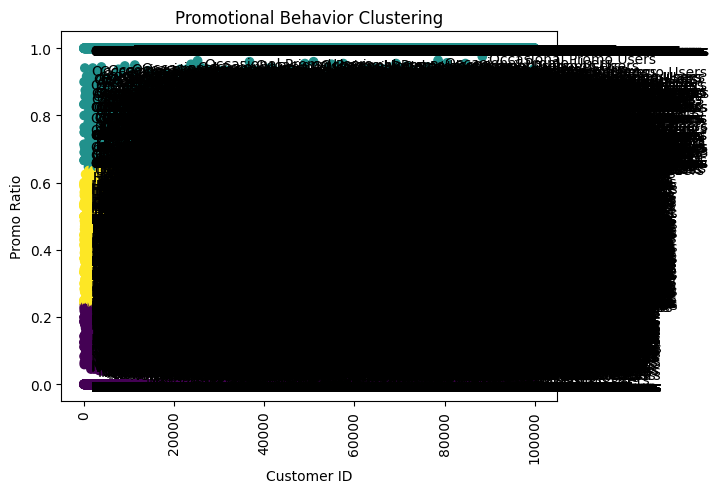

In [26]:
# Assign cluster labels to segment names
segment_names = {
    0: "Non-Promo Users",
    1: "Occasional Promo Users",
    2: "Heavy Promo Users"
}

# Assign segment names to each customer
merged_counts['segment'] = merged_counts['cluster'].map(segment_names)

# Plot the clusters
plt.scatter(merged_counts['customer_id'], merged_counts['promo_ratio'], c=merged_counts['cluster'], cmap='viridis')
plt.xlabel('Customer ID')
plt.ylabel('Promo Ratio')
plt.title('Promotional Behavior Clustering')
plt.xticks(rotation=90)

# Annotate segment names on the plot
for i, txt in enumerate(merged_counts['segment']):
    plt.annotate(txt, (merged_counts['customer_id'][i], merged_counts['promo_ratio'][i]), xytext=(5,-5), textcoords='offset points')

plt.show()


## promo_code Mapping

In [20]:
promo_code_mapping = {0: 0, 'AZ2022': 1, 'BUYMORE': 2, 'WEEKENDSERU': 3, 'XX2022': 4, 'LIBURDONG': 5, 'WEEKENDMANTAP': 6, 'SC2022': 7, 'STARTUP': 8}

# Apply the mapping to the promo_code column
merged_new['promo_code'] = merged_new['promo_code'].map(promo_code_mapping)

In [ ]:
len(merged_new[merged_new['first_join_date'].dt.date == merged_new['created_at'].dt.date])

35291

## relationship bet promo usage and new customer influx

In [ ]:
len(merged_new[merged_new['w_promo'] == 1])

481139

In [ ]:
promo_date = merged_new.groupby('promo_code')['created_at'].agg(['min', 'max'])

# the date range for each promo_code
print(promo_date)

                  min        max
promo_code                      
0          2016-06-30 2022-07-31
1          2016-07-04 2022-07-29
2          2016-07-04 2022-07-29
3          2016-07-02 2022-07-31
4          2016-07-01 2022-07-29
5          2016-07-09 2022-07-31
6          2016-07-03 2022-07-31
7          2016-07-04 2022-07-29
8          2016-07-12 2022-07-29


In [ ]:
promo_month = merged_new[merged_new['payment_status'] == 'Success'].groupby('promo_code')['created_at'].apply(lambda x: x.dt.month.unique())

# Print the unique months for each promo_code
print(promo_month)

promo_code
0    [7, 9, 11, 12, 3, 5, 2, 8, 10, 1, 4, 6]
1    [6, 4, 7, 12, 3, 10, 2, 9, 1, 5, 11, 8]
2    [2, 8, 11, 1, 7, 10, 3, 6, 12, 9, 4, 5]
3    [7, 8, 10, 9, 1, 11, 2, 3, 5, 6, 12, 4]
4    [6, 12, 1, 8, 9, 4, 5, 3, 10, 11, 7, 2]
5    [12, 4, 11, 5, 2, 9, 8, 7, 1, 6, 10, 3]
6    [2, 7, 4, 1, 3, 6, 9, 10, 8, 11, 12, 5]
7    [12, 1, 7, 6, 11, 2, 4, 10, 8, 3, 9, 5]
8    [4, 7, 3, 1, 6, 8, 12, 2, 9, 11, 10, 5]
Name: created_at, dtype: object




> promocode 이름에 의미없음 -> 연도, 월 상관없이 사용됐기 때문.



## customer influx by promo

In [ ]:
# total: 1254585 rows
# first_join_date와 created_at 의 날짜가 동일한 row 수 추출
matching_dates_promo = merged_new[(merged_new['first_join_date'].dt.date == merged_new['created_at'].dt.date) & (merged_new['w_promo'] == 1)]
count_matching = len(matching_dates_promo)
count_matching / merged_new.shape[0]

0.009974613119079217

In [ ]:
# first created_at( merged_new.shape[0] proportionfirst_transaction)에서 promo가 사용된 결제의 비율
first_transaction = merged_new.groupby('customer_id')['created_at'].min()
completed_promo_transactions = merged_new[merged_new['w_promo'] == 1]
customers_completed_promo = first_transaction[first_transaction.isin(completed_promo_transactions['created_at'])]
proportion = len(customers_completed_promo) /

0.040414957934296995

Only 4% 만이 promo_code 로 인해 가입했다 말할수 있음!

In [ ]:
# first_join_date와 created_at 의 날짜가 동일하고 w_promo가 1인 row 수 추출
matching = merged_new[merged_new['first_join_date'].dt.date == merged_new['created_at'].dt.date]
matching_promo = matching[matching['w_promo'] == 1]
new_customers_promo = len(matching_promo) / len(matching)
new_customers_promo

0.35459465586126776

In [ ]:
199832 - 191247	- 10000 - 1415

-2830

In [ ]:
promo_by_customer

In [ ]:
863863-(98088+443219+134257)-(11701*3)

153196

In [ ]:
268925-4146

264779

In [ ]:
transaction['discount'] = transaction['total_amount'] // transaction['promo_amount']

In [ ]:
test_ttl['item_price'].sum() + shipment_fee - promo_amount

1294812

In [ ]:
1294812 + 10000 - 9072

1295740

In [ ]:
test_ttl = merged_new[(merged_new['customer_id'] == 4774) & (merged_new['created_at'] == '2019-08-10')]
test_ttl
test_ttl['item_price'] - test_ttl['promo_amount'] + test_ttl['shipment_fee']

,first_join_date,customer_id,created_at,payment_method,payment_status,promo_amount,promo_code,shipment_fee,quantity,item_price,total_amount,product_id,username,gender,birthdate,device_type
9,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,292052,1295740,53051,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
10,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,241945,1295740,46352,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
11,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,297248,1295740,6352,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
12,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,191138,1295740,26620,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
13,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,78559,1295740,22849,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
14,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,193870,1295740,56247,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android


In [ ]:
total_price = test_ttl['item_price'].sum()
print(total_price)
9072*
ttl_aft_promo = total_price - test_ttl['promo_amount'].sum()
ttl_aft_promo

1294812


1240380

In [ ]:
promo_rate = merged_new[(merged_new['payment_status'] == 'Success') & (merged_new['promo_code'] != 0)]

promo_rate

,first_join_date,customer_id,created_at,payment_method,payment_status,promo_amount,promo_code,shipment_fee,quantity,item_price,total_amount,product_id,username,gender,birthdate,device_type
0,2018-07-28,5868,2018-07-29,Debit Card,Success,1415,3,10000,1,191247,199832,54728,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,F,2000-08-20,Android
5,2018-07-28,4774,2019-02-03,Debit Card,Success,6369,6,5000,1,183234,181865,59620,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
8,2018-07-28,4774,2019-06-24,Credit Card,Success,4019,1,10000,1,364776,370757,12282,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
9,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,292052,1295740,53051,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
10,2018-07-28,4774,2019-08-10,Credit Card,Success,9072,3,10000,1,241945,1295740,46352,5009ab96-84ff-44ef-98b0-c1b492658c29,F,1996-03-15,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254575,2022-05-06,99675,2022-07-07,Credit Card,Success,3388,4,0,1,488722,485334,35318,b12282d0-f890-41b3-977e-43a7f89b95c1,F,1991-08-17,iOS
1254581,2021-12-08,34829,2021-12-09,OVO,Success,5010,1,10000,1,354213,359203,19394,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,F,2006-04-21,Android
1254582,2021-12-08,99645,2021-12-11,Credit Card,Success,2181,3,5000,4,288835,1158159,13079,f09d115a-a950-451e-9c4f-de117a2657f4,F,1991-03-17,Android
1254583,2019-12-18,87319,2019-12-18,Credit Card,Success,4503,1,0,1,188646,184143,11312,57561022-e2f9-42de-a46b-428cce52e5dc,F,2007-10-26,iOS


In [ ]:
# check the num of new join during promo period


0          3
5          6
8          1
9          3
10         3
          ..
1254575    4
1254581    1
1254582    3
1254583    1
1254584    2
Name: promo_code, Length: 481139, dtype: int64

In [ ]:
# Convert 'created_at' and 'first_join_date' to datetime
merged['created_at'] = pd.to_datetime(merged['created_at'])
merged['first_join_date'] = pd.to_datetime(merged['first_join_date'])

# Calculate tenure in days
merged['tenure'] = (merged['created_at'] - merged['first_join_date']).dt.days

In [ ]:
transaction_re = transaction.to_csv('preprocessed_transaction.csv', index=False)

In [ ]:
merged['tenure'].value_counts()
# 2022

NameError: ignored

In [ ]:
# Calculate the proportion of transactions with promotions
total_transactions = len(transaction)
promotions_count = transaction['promo_code'].notnull().sum()
promotions_proportion = promotions_count / total_transactions

# Calculate the proportion of transactions without promotions
no_promotions_count = total_transactions - promotions_count
no_promotions_proportion = no_promotions_count / total_transactions

print("Proportion of transactions with promotions:", promotions_proportion.round(2))
print("Proportion of transactions without promotions:", no_promotions_proportion.round(2))

Proportion of transactions with promotions: 0.38
Proportion of transactions without promotions: 0.62


In [ ]:
# Identify customers who have churned (not made any recent transactions)
churned_customers = customer[~customer['customer_id'].isin(transaction['customer_id'])]

# Analyze their promotional behavior
churned_promotions_count = churned_customers['promo_code'].notnull().sum()
churned_no_promotions_count = len(churned_customers) - churned_promotions_count

print("Churned customers using promotions:", churned_promotions_count)
print("Churned customers not using promotions:", churned_no_promotions_count)

KeyError: ignored